In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 데이터 시각화 (Matplotlib) 활용와 왕좌의 게임 데이터 분석

## 1. matplotlib 간단 실습

### 1.1 하나의 그래프 그리기
1.1.1 line graph 그리기

In [2]:
import matplotlib.pyplot as plt

In [5]:
sr = Series([10, 20, 30, 20, 10], index = ['a','b','c','d','e'])
sr

a    10
b    20
c    30
d    20
e    10
dtype: int64

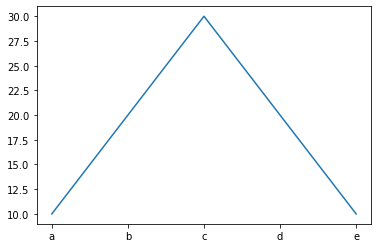

In [6]:
plt.plot(sr)

1.1.2 bar graph 그리기

In [7]:
import random 
sr2 = Series(random.sample(range(100, 1000), 5),
            index = ['a','b','c','d','e'])
sr2

a    739
b    605
c    259
d    811
e    904
dtype: int64

<BarContainer object of 5 artists>

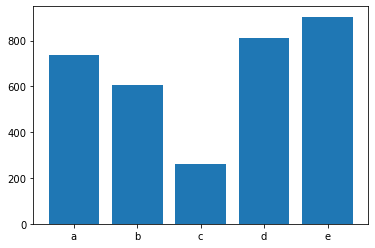

In [10]:
plt.bar(sr2.index, sr2.values)

<AxesSubplot:>

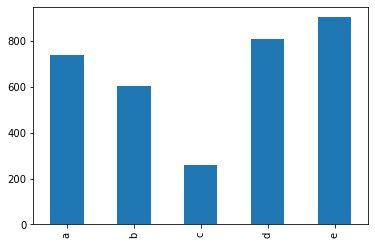

In [13]:
# pandas plot 
sr2.plot(kind = "bar")

1.1.3 두 개의 그래프를 하나로 그리기

- <a href = https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html> plt.subplots() </a> 함수는 새로운 figure와 axes(subplots)를 생성해 준다.

<BarContainer object of 5 artists>

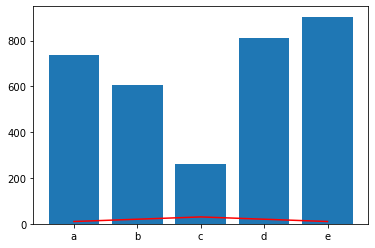

In [19]:
fig, ax = plt.subplots()
ax.plot(sr, color = 'r')
ax.bar(sr2.index, sr2.values)

1.1.4 두 개 그래프를 서로 다른 y축 적용하기

<BarContainer object of 5 artists>

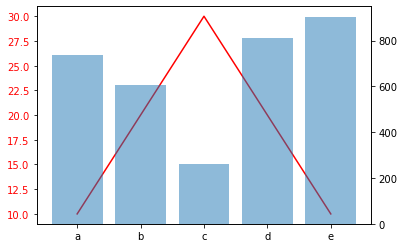

In [23]:
fig, ax = plt.subplots()
ax.plot(sr, color = 'r')
ax.tick_params(axis = 'y', labelcolor = 'r')
ax2 = ax.twinx()
ax2.bar(sr2.index, sr2.values, alpha = 0.5)

### 1.2. 여러 개 그래프 그리기 
하나의 figure 안에 여러 개의 axes를 그리기

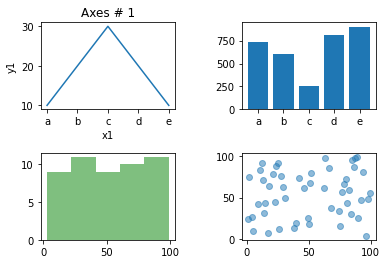

In [40]:
fig, ax_list = plt.subplots(2,2)
ax_list[0, 0].plot(sr)# 0, 0 위치에 그래프 그리기 
ax_list[0,0].set_title("Axes # 1")
ax_list[0,0].set_xlabel('x1') # 아래 그래프에 가려져서 안나옴 간격 띄워줘야함
ax_list[0,0].set_ylabel("y1")


ax_list[0,1].bar(sr2.index, sr2.values)
ax_list[1,0].hist(random.sample(range(1,100), 50), bins = 5, color='g', alpha = 0.5) # bins : 몇개의 구간으로 나눌지 
ax_list[1,1].scatter(random.sample(range(1,100), 50), random.sample(range(1,100), 50), alpha=0.5)
# scatter에 알파값을 줘서 반투명으로 만들어야 값이 겹쳐있는지, 어떤지 잘 보인다. 

# 그래프 간 간격조정 
fig.subplots_adjust(hspace =0.5, wspace =0.5) # 그래프 간 간격 조정이기 때문에 fig. ~ 
plt.subplots_adjust(hspace =0.5, wspace =0.5)

### 1.3. <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> backend </a> 개념
Matplotlib은 매우 다양한 usecase에 사용되며, 이를 모두 충족시키기 위하여 다양한 backend를 지원함.  
가장 많이 활용하는 옵션은 inline으로, 그래프를 output창에 바로 표현되도록 하는 옵션이며, <strong>%maptlotlib inline</strong>를 실행하여 설정한다. 


%로 시작하는 명령어는 Cell Magic 명령어로써, 파이썬 코드가 아니라 Jupyter에게 특정 기능을 수행하도록 하는 명령이다. 즉, %matplotlib inline 명령은 Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령이다.

만약 그래프를 생성한 이후, interactive하게 그래프를 다루고 싶은 경우에는 backend를 interactive backend로 설정하면 된다.  
예를 들어, <strong>%matplotlib nbagg</strong>를 실행하여 <strong>nbagg</strong>으로 설정을 변경할 수 있다.   
보다 다양한 설정 옵션을 확인하려면 <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> 여기 </a>를 참고하면 된다.  

아래와 같이 nbagg로 설정한 후, 그래프를 생성하면 output 창에 몇몇 버튼과 함께 그래프가 그려진다.  
버튼들을 활용하여 zoon-in, zoom-out이 가능하다.   
그래프를 그린 이후, set_title(), set_xlabel() 함수를 수행하면 현재 그래프에 적용되는 것을 확인할 수 있으며, 오른쪽 상단에 있는 파란색 버튼을 클릭하면 interactive 모드가 종료된다. 

In [46]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


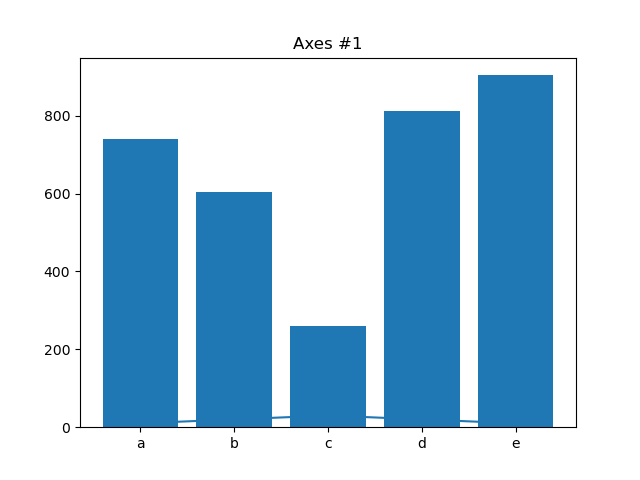

In [51]:
# 뭔가.. 홈페이지마냥 나온다. 
fig, ax = plt.subplots()
plt.plot(sr)

In [52]:
ax.set_title("Axes #1")

Text(0.5, 1.0, 'Axes #1')

In [53]:
ax.bar(sr2.index, sr2.values) # 쓰면 바로바로 위에 적용되어 나온다. 

<BarContainer object of 5 artists>

### 1.4 <a href = https://matplotlib.org/users/customizing.html> matplotlib 설정 변경</a>

<strong> 1.4.1 stylesheet 변경</strong>   
   matplotlib을 통해 데이터 시각화할 때 적용되는 스타일을 변경 가능하며, 사용가능한 스타일시트 목록 및 샘플은 <a href= https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html> 여기 </a>에서 확인 가능하다.

In [54]:
plt.style.available # 제공해주는 그래프 스킨 보여줌

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [55]:
%matplotlib inline 

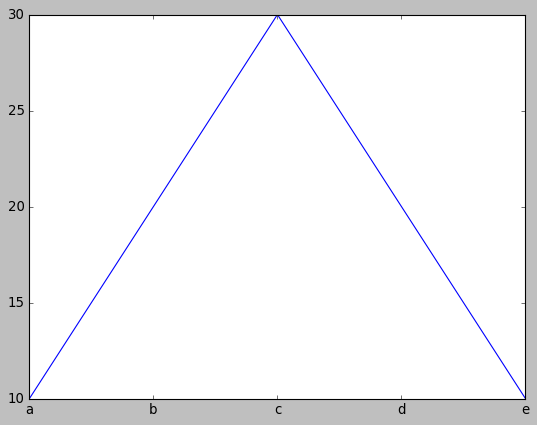

In [59]:
plt.style.use('classic') # 옛날스타일로 그릴래
plt.plot(sr)

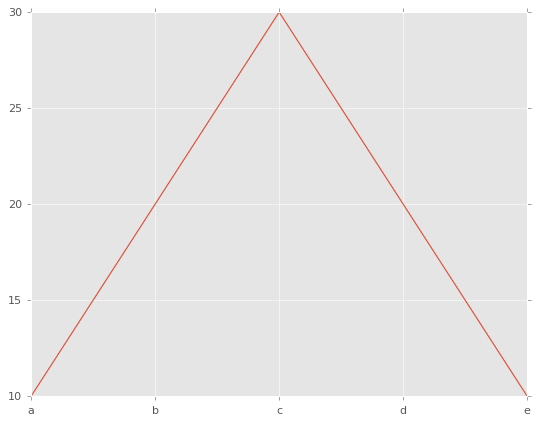

In [60]:
plt.style.use('ggplot') # 옛날스타일로 그릴래
plt.plot(sr)

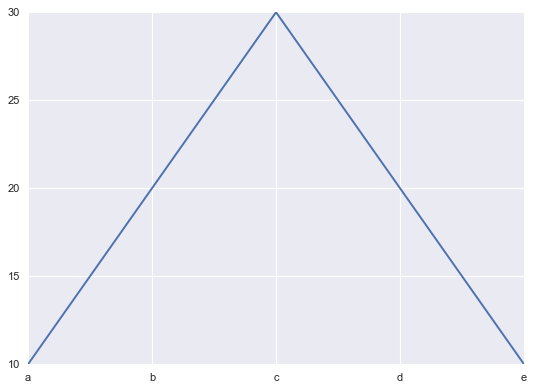

In [64]:
plt.style.use('seaborn') # 옛날스타일로 그릴래
plt.plot(sr)

1.4.2 <strong> <i> matplotlibrc</i></strong> 파일 수정을 통한 파라미터 수정 
- matplotlibrc 파일을 통해 figure 크기, axes의 폰트사이즈, 색상, 스타일 등 matplotlib의 모든 속성(property)들을 설정 가능하다. 
- 파일을 변경한 후 저장하면, 이후에는 변경된 설정이 계속 사용된다.
- matplotlibrc 파일을 수정한 후에는 jupyter notebook을 재시작해야 수정 내용이 반영된다. 


matplotlibrc 파일의 위치를 찾으려면 matplotlib.matplot.lib_fname()를 수행하면 된다.

In [67]:
import matplotlib # 아까는 pyplot만 불러온 것이기 때문에 다시 임포트 해주어야 한다. 
matplotlib.matplotlib_fname() # 파일이 위치한 곳. 

'/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

1.4.3 matplotlib.rcParams을 통한 동적 설정 변경

- matplotlib의 설정 정보는 <strong> matplotlib.rcParams</strong>에 저장되어 있으며, rcParams는 <strong><i>사전(Dict)</i></strong> 타입니다.
- rcParams 변경을 통해 동적으로 설정이 변경가능하며, 변경 즉시 반영된다. 

In [68]:
matplotlib.rcParams # figure 관련 파라미터,  font 관련 파라미터, line 그래프 파라미터..... 짱많아. 

RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [71]:
matplotlib.rcParams['font.family'] = 'AppleGothic'

In [72]:
matplotlib.rcParams['font.family'] # 위에서 변경해주었다. (설정을 바꿔준 것 . 주피터 끄면 초기화됨)

['AppleGothic']

## 2. <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html>Pandas의 plot() 함수를 통한 시각화</a>
- pandas의 대표적인 데이터타입인 Series와 DataFrame은 plot() 함수를 제공하며 이를 통해 여러 차트를 그릴 수 있다.   
- 내부적으로는 Series.plot()과 DataFrame.plot() 모두 matplotlib를 사용하며, 파라미터 인자에 따라 적절한 함수가 호출된다.  
- matplotlib은 plot()은 line graph, bar()는 bar graph, hist()는 히스토그램 등 차트의 종류에 따라 다른 함수를 호출해야 하지만, pandas는 차트의 종류에 상관 없이, 차트를 그리는 함수는 plot()이며, kind 인자를 통해 차트의 종류를 설정할 수 있다.   
- matplotlib의 함수들을 직접 사용하는 것보다 사용자 친화적인 인터페이스를 제공하지만, matplotlib의 모든 기능을 제공하지는 않으므로 약간의 불편함은 존재한다.


In [19]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
인구통계 = {'서울': [1053.5, 1023, 987],
        '경기':[1023, 1067, 1123],
        '충청':[512,489,487],
        '경상':[897, 872, 811],
        '전라':[451, 421, 399]
      }
df = DataFrame(인구통계)
df.index = [2018, 2019, 2020]

기본 그리기 - <a href= https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D>line graph</a>

In [5]:
df

,서울,경기,충청,경상,전라
2018,1053.5,1023,512,897,451
2019,1023.0,1067,489,872,421
2020,987.0,1123,487,811,399


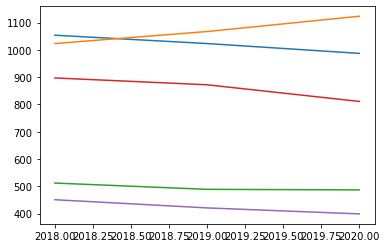

In [12]:
plt.plot(df)

In [13]:
import matplotlib as plt 
plt.rcParams['font.family'] = 'AppleGothic'

<AxesSubplot:>

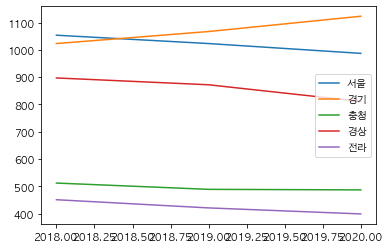

In [14]:
df.plot(kind='line')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

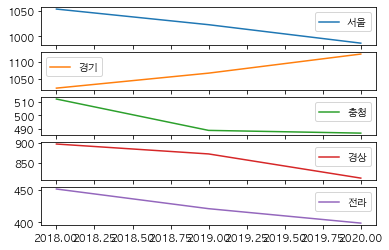

In [25]:
df.plot(kind = 'line', subplots = 'True') # subplots : 각각 따로 그래프를 그릴거냐~!?
# 만약 여기에 제목 달거면 리스트형식으로 개수에 맞게 제목 써줘야함

<AxesSubplot:>

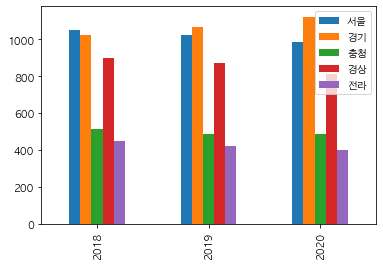

In [21]:
df.plot(kind = 'bar')
plt.bar(df.index,  df['서울'])
# 둘이 같은 결과

##### df.plot -> plot이 데이터프레임의 함수이기 때문이다. 

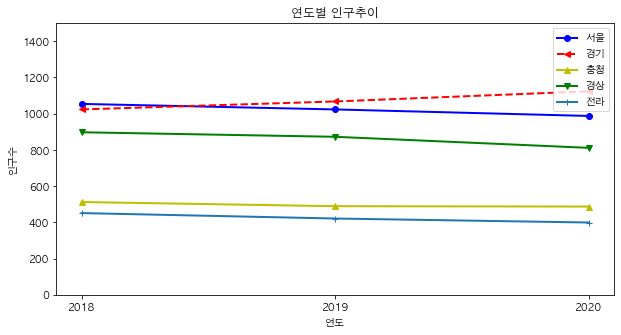

In [62]:
axes = df.plot(kind = 'line', title = '연도별 인구추이', xlabel = '연도', ylabel = '인구수', figsize=(10,5),
       subplots = False,
       xticks = df.index,
       ylim = [0, 1500],
       style = ['bo-','r<--','y^-','vg-','+-','o-'], 
       lw = 2)

<img src="img/예제실습/matplotlib인자.jpg" alt=" matplotlib" style="width: 1200px;"/>

#### 색상: https://matplotlib.org/examples/color/named_colors.html
#### 기타 스타일: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

array([<AxesSubplot:title={'center':'2018'}>,
       <AxesSubplot:title={'center':'2019'}>,
       <AxesSubplot:title={'center':'2020'}>], dtype=object)

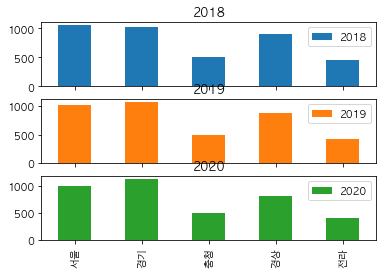

In [47]:
# 실습. 연도별 지역별 인구수 그래프 그리기
df.T.plot(kind = 'bar', subplots = True)

## 3. 왕좌의 게임 데이터 분석 및 시각화 실습
#### 1) 데이터 적재
- battless.csv : 전투의 이름, 발생년도, 공격/수비 정보(가문, 왕, 군대 규모 등)을 저장
- deaths.csv : 캐릭터들의 이름, 성별 등 기본 정보와 사망 정보

In [34]:
battle = pd.read_csv('data/data-society-game-of-thrones/battles.csv')
death = pd.read_csv('data/data-society-game-of-thrones/character-deaths.csv')

In [66]:
battle.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [67]:
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


#### 2) 책의 권(Book of Death)별로 사망자 수 추이 시각화

In [68]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [69]:
# 1) Series.value_counts() 함수 활용 

bookofdeath = death['Book of Death'].value_counts().sort_index()

# 2) pivot table 
death.pivot_table(index = 'Book of Death', values='Name', aggfunc='count')

,Name
Book of Death,
1.0,49
2.0,73
3.0,97
4.0,27
5.0,61


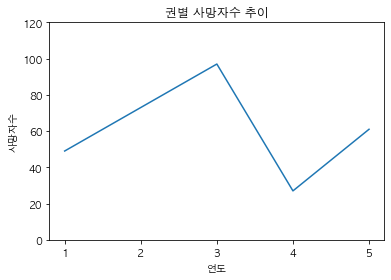

In [72]:
bookofdeath.columns = ['# of death']
axes = bookofdeath.plot(xticks=bookofdeath.index, ylim=[0, 120], title='권별 사망자수 추이', 
                xlabel='연도',ylabel='사망자수')

In [74]:
axes.figure.savefig('권별사망자수.jpg')

#### 3) 대규모 전투의  공격진영과 수비 진영의 숫자 시각화
대규모 전투 = 공격과 수비 모두 합쳐서 10,000명 이상 참가한 전쟁

In [77]:
# 1. 대규모 전투만 선택 

big_battles = battle[battle.attacker_size + battle.defender_size > 10000]

In [89]:
# 1번째 방법
big_battles2 = big_battles[['name','attacker_size','defender_size']].set_index('name')

<AxesSubplot:ylabel='name'>

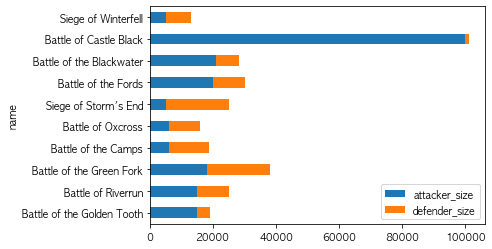

In [91]:
big_battles2.plot(kind = 'barh',
                 stacked=True) #하나의 막대그래프에 그림 


<AxesSubplot:ylabel='name'>

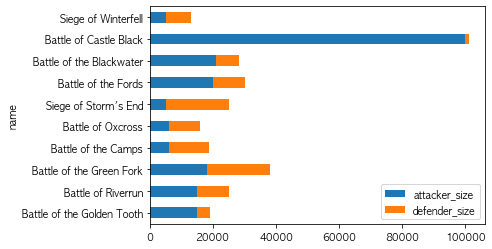

In [95]:
# 2번 방법 
big_battles.plot(x = 'name', y = ['attacker_size','defender_size'], kind ='barh', stacked=True)

#### 4) (실습 #1) 가문 별로 전쟁을 참여한 횟수 시각화

In [253]:
battle['attacker_1'].nunique()

11

In [265]:
aa = pd.concat([aa, battle['defender_4']])

<AxesSubplot:>

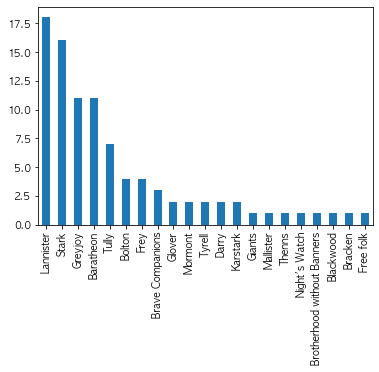

In [270]:
aa.value_counts().plot(kind='bar')

In [228]:
b = pd.concat([b, battle['defender_4']])

In [236]:
pd.concat([battle['attacker_1'], battle['attacker_2']], axis=0)

0     Lannister
1     Lannister
2     Lannister
3         Stark
4         Stark
        ...    
33          NaN
34          NaN
35         Frey
36    Lannister
37     Karstark
Length: 76, dtype: object

#### 5) (실습 #2) 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수 시각화

<AxesSubplot:xlabel='Death Year'>

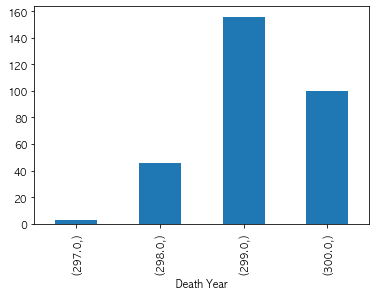

In [271]:
death[['Death Year']].value_counts().sort_index().plot(kind='bar')

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


# 첫번째 문제 풀이 정답
### 가문 별로 전쟁을 참여한 횟수 시각화

In [283]:
# 필요한 컬럼만 선택
battle.loc[:,'attacker_1':'defender_4'] # ********** 

# 정규표현식 활용  슬라이싱 못하는 상황이라면? filter
ex1 = battle.filter(regex = '^attacker_[1-4]|defender_[1-4]', axis=1)

In [285]:
ex1.attacker_1.value_counts()

Stark                          8
Lannister                      8
Greyjoy                        7
Baratheon                      6
Frey                           2
Bolton                         2
Brotherhood without Banners    1
Darry                          1
Brave Companions               1
Bracken                        1
Free folk                      1
Name: attacker_1, dtype: int64

In [289]:
전쟁가문 = Series(dtype = 'float64')
for col in ex1.columns:
    전쟁가문 = 전쟁가문.add(ex1[col].value_counts(), fill_value = 0)

<AxesSubplot:>

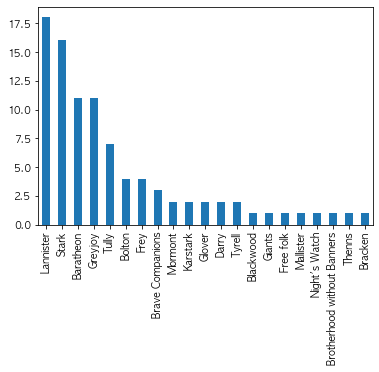

In [294]:
전쟁가문.sort_values(ascending=False).plot(kind = 'bar')

#### =============================+

In [297]:
for idx, data in ex1.iterrows():
    print(set(data))
    # set은 중복을 제거하고 만들어준다. 
    

{nan, nan, nan, 'Tully', 'Lannister'}
{nan, nan, nan, 'Lannister', 'Baratheon'}
{nan, nan, nan, 'Tully', 'Lannister'}
{nan, nan, nan, 'Lannister', 'Stark'}
{nan, nan, nan, 'Tully', 'Lannister', 'Stark'}
{nan, nan, nan, 'Tully', 'Lannister', 'Stark'}
{nan, nan, nan, 'Lannister', 'Darry'}
{nan, nan, nan, 'Greyjoy', 'Stark'}
{nan, nan, nan, 'Greyjoy', 'Stark'}
{nan, nan, nan, 'Greyjoy', 'Stark'}
{nan, nan, nan, 'Greyjoy', 'Stark'}
{nan, nan, nan, 'Greyjoy', 'Stark'}
{nan, nan, nan, 'Greyjoy', 'Stark'}
{nan, nan, nan, 'Bolton', 'Greyjoy', 'Stark'}
{nan, nan, nan, 'Tully', 'Lannister', 'Stark'}
{nan, nan, nan, 'Baratheon'}
{nan, nan, nan, 'Tully', 'Lannister'}
{nan, nan, nan, 'Lannister', 'Stark'}
{nan, nan, nan, 'Lannister', 'Stark'}
{nan, nan, nan, 'Lannister', 'Baratheon'}
{nan, nan, nan, 'Darry', 'Lannister'}
{nan, nan, nan, 'Lannister', 'Stark'}
{nan, nan, nan, 'Brave Companions', 'Brotherhood without Banners'}
{nan, nan, nan, 'Lannister', 'Stark'}
{nan, nan, nan, 'Brave Companions', '

# 두번째 문제 풀이 정답
### 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수 시각화

In [305]:
battle_of_year = battle.year.value_counts() # -> 결과가 시리즈로 
# battle.pivot_table(index='year', values='name', aggfunc='count') # -> 결과가 데이터프레임으로 

In [308]:
death_for_year = death['Death Year'].value_counts()

In [312]:
ex2 = pd.concat([battle_of_year, death_for_year], axis=1)

In [313]:
ex2.columns = ['# of batttles', '# of death']
ex2

,# of batttles,# of death
297.0,NaN,3
298.0,7.0,46
299.0,20.0,156
300.0,11.0,100


In [318]:
ex2.fillna(0, inplace=True)

<AxesSubplot:>

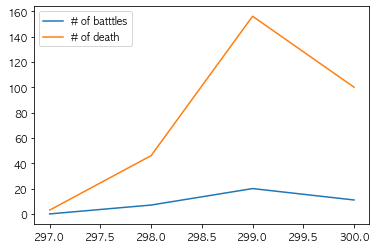

In [320]:
ex2.plot()

In [323]:
ex2.corr()

,# of batttles,# of death
# of batttles,1.00000,0.98991
# of death,0.98991,1.00000
